# Import Libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Dataset and Date Column is Datetime Type

In [96]:
df = pd.read_csv("budget.csv")

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Total spent per category 

In [97]:
category_summary = df.groupby('Category')['Amount'].agg(['sum', 'mean', 'count']).reset_index()
category_summary.rename(columns={'sum': 'Total_Spent', 'mean': 'Avg_Per_Transaction', 'count': 'Transactions'}, inplace=True)
print("=== Spending by Category ===")
print(category_summary)


=== Spending by Category ===
                Category  Total_Spent  Avg_Per_Transaction  Transactions
0        Adulting Things     57621.73           157.007439           367
1  Main Character Energy     54462.72           150.449503           362
2       Productivity Era     52254.72           151.462957           345


# Total spent per payment method

In [98]:
payment_summary = df.groupby('Payment_Method')['Amount'].agg(['sum', 'mean', 'count']).reset_index()
payment_summary.rename(columns={'sum': 'Total_Spent', 'mean': 'Avg_Per_Transaction', 'count': 'Transactions'}, inplace=True)
print("\n=== Spending by Payment Method ===")
print(payment_summary)


=== Spending by Payment Method ===
  Payment_Method  Total_Spent  Avg_Per_Transaction  Transactions
0           Cash     82263.01           149.569109           550
1         Online     82076.16           156.633893           524


# Highest and Lowest Spending Day

In [99]:

df['Weekday'] = df['Date'].dt.day_name()

weekday_summary = df.groupby('Weekday')['Amount'].sum().reset_index()

weekday_summary_sorted = weekday_summary.sort_values(by='Amount', ascending=False)

print("=== Total Spending by Weekday ===")
print(weekday_summary_sorted)

max_spent_row = weekday_summary_sorted.iloc[0]
print(f"\n💸 You spent the most on: {max_spent_row['Weekday']} (${max_spent_row['Amount']:.2f})")

min_spent_row = weekday_summary_sorted.iloc[-1]
print(f"\n🤑 You spent the least on: {min_spent_row['Weekday']} (${min_spent_row['Amount']:.2f})")


=== Total Spending by Weekday ===
     Weekday    Amount
3     Sunday  26893.19
6  Wednesday  26269.18
1     Monday  24001.48
5    Tuesday  23014.35
4   Thursday  22003.29
2   Saturday  21664.69
0     Friday  20492.99

💸 You spent the most on: Sunday ($26893.19)

🤑 You spent the least on: Friday ($20492.99)


# Top Merchants by Spending

In [100]:
merchant_summary = df.groupby('Merchant')['Amount'].sum().reset_index()

merchant_summary = merchant_summary.sort_values(by='Amount', ascending=False)

merchant_summary.reset_index(drop=True, inplace=True)

merchant_summary.index += 1
print("Top Merchants by Spending:")
print(merchant_summary)


Top Merchants by Spending:
        Merchant    Amount
1        Walmart  13491.49
2           Rent  13410.99
3          Apple  12182.50
4      Starbucks  11552.73
5         Notion  11092.57
6            Gym  10883.05
7           Zara  10686.85
8   Movie Ticket  10667.44
9        Spotify  10541.90
10        Amazon  10495.24
11     Boba Guys  10392.62
12   TikTok Shop  10334.14
13         Shein  10085.75
14      Coursera   9625.30
15    McDonald's   8896.60


# 7-Day Rolling Average Spending Over Time

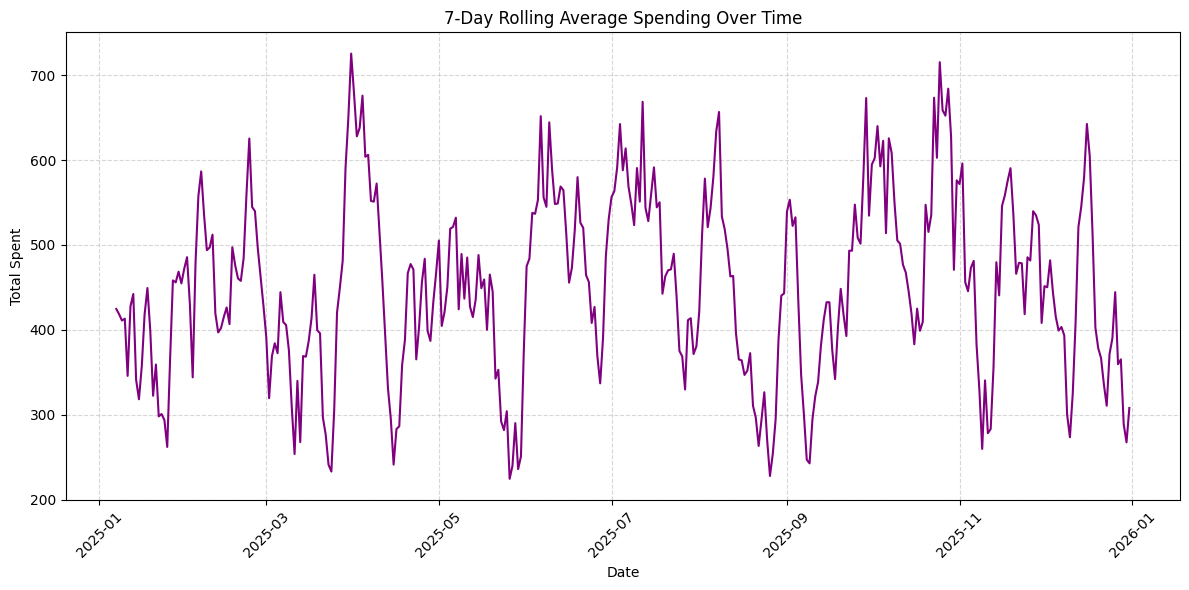

In [101]:
daily_spending = df.groupby('Date')['Amount'].sum().reset_index()

daily_spending['Rolling_Avg'] = daily_spending['Amount'].rolling(window=7).mean()  # 7-day avg

plt.figure(figsize=(12,6))
plt.plot(daily_spending['Date'], daily_spending['Rolling_Avg'], color='purple')
plt.title('7-Day Rolling Average Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Total Spending by Category

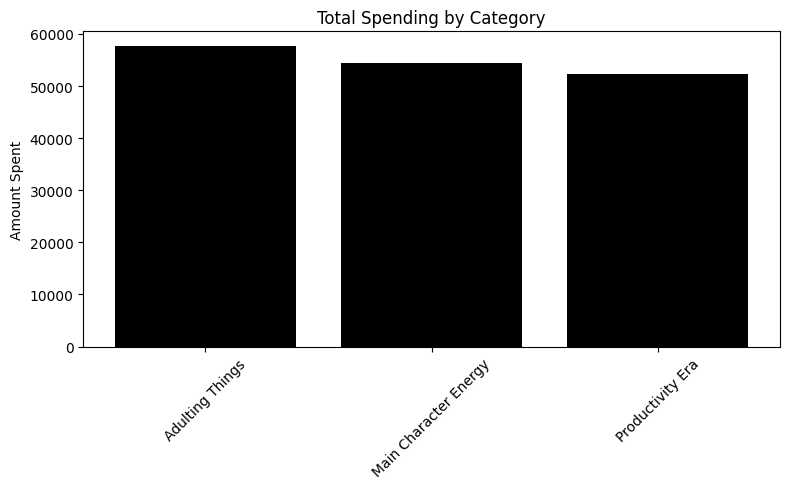

In [102]:
category_summary = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,5))
plt.bar(category_summary['Category'], category_summary['Amount'], color='black')
plt.title('Total Spending by Category')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Merchants by Spending

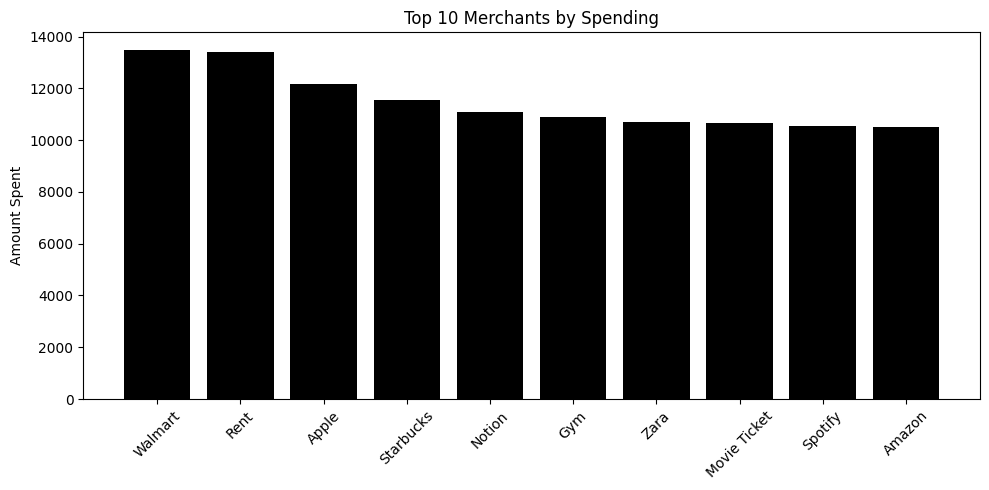

In [103]:
merchant_summary = df.groupby('Merchant')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
plt.bar(merchant_summary['Merchant'][:10], merchant_summary['Amount'][:10], color='black')
plt.title('Top 10 Merchants by Spending')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Spending Distribution by Payment Method

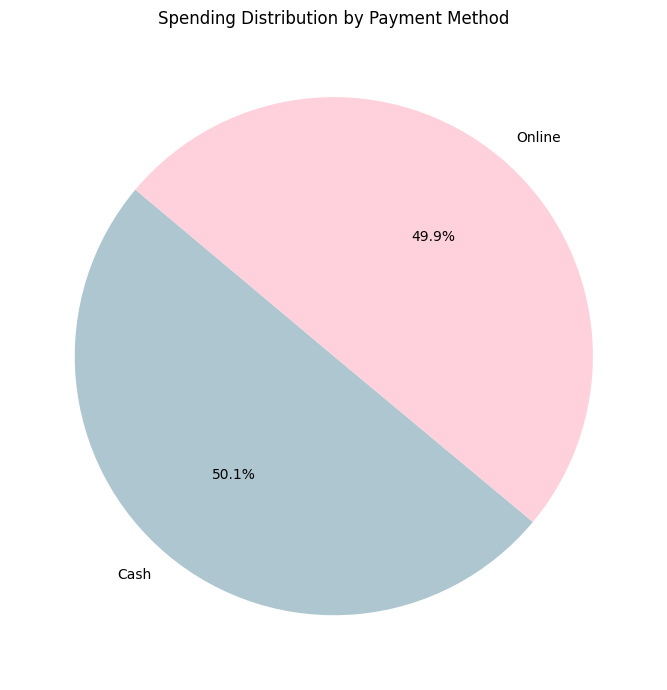

In [104]:
payment_summary = df.groupby('Payment_Method')['Amount'].sum().reset_index()

pastel_colors = ['#AEC6CF', '#FFD1DC', '#FFB347'] 

plt.figure(figsize=(7,7))
plt.pie(payment_summary['Amount'],
        labels=payment_summary['Payment_Method'],
        autopct='%1.1f%%',
        startangle=140,
        colors=pastel_colors[:len(payment_summary)])  # match number of slices
plt.title('Spending Distribution by Payment Method')
plt.tight_layout()
plt.show()
